In [1]:
%%capture
#%matplotlib inline
%matplotlib notebook

%load_ext autoreload
%autoreload 2

%reset -f

import os, sys
import numpy as np

import pylab as plt
import matplotlib as mpl
import scipy.io

#plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams.update({"axes.grid" : True})
#plt.rcParams['font.family'] = 'DeJavu Serif'
#plt.rcParams['font.serif'] = ['Times New Roman']

#plt.rcParams.update({'font.size': 14})

# Simulation as a function ot the Kinetic Inductance $L_k$

In [2]:
from dartwarslab.base import file2dic

In [3]:
#filename = 'Lk30_t10_w1_s1_d100_eps9.1.h5'
#pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/9.1/sim-results/sim_eps9.1_Lk30/savepath'

#filename = 'Lk30_t10_w1_s1_d100_eps9.1.h5'
#pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/v3/ellfree_v_d/analysis/simdata/Lk30_eps9.1_d100/savepath'

filename = 'Lk30_t10_w1_s1_d400_eps9.1.h5'
pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/v3/ellfree_v_d/analysis/simdata/Lk30_eps9.1_d400/savepath'


#filename = 'Lk29_t10_w1_s1_d100_eps9.1.h5'
#pathname = '/home/giachero/gsbox/kids_rd/DARTWARS/sonnet-sim/IMS-NIST/9.1/sim-results/sim_eps9.1_Lk29/savepath'

In [4]:
d = file2dic(os.path.join(pathname,filename)).read()['l']

In [5]:
l     = np.array(list(map(float ,[l for l in d])))
C0    = np.array([d[l]['C']['C0']   for l in d])
CfitC = np.array([d[l]['C']['p'][0] for l in d])
LfitC = np.array([d[l]['L']['p'][0] for l in d])

L0    = np.array([d[l]['L']['L0']   for l in d])
LfitL = np.array([d[l]['L']['p'][1] for l in d])
CfitL = np.array([d[l]['C']['p'][1] for l in d])


In [6]:
CfitC

array([1.39985411e-15, 7.86626797e-15, 9.14761206e-15, 1.04279544e-14,
       1.17076711e-14, 1.29845699e-14, 1.42612579e-14, 1.55382230e-14,
       1.68150305e-14, 1.80907745e-14, 1.93664924e-14, 2.70954347e-15,
       2.06419578e-14, 2.19171604e-14, 2.31921058e-14, 2.44669421e-14,
       2.57415405e-14, 2.70158633e-14, 2.82871964e-14, 2.95612732e-14,
       3.08352235e-14, 3.21073262e-14, 4.00645475e-15, 3.33808927e-14,
       3.46546036e-14, 3.59281628e-14, 3.72017571e-14, 3.84750487e-14,
       3.97483685e-14, 4.10217772e-14, 4.22978479e-14, 4.35712551e-14,
       4.48415032e-14, 5.29629875e-15, 4.61146967e-14, 4.73878744e-14,
       4.86610415e-14, 4.99342016e-14, 5.12073427e-14, 5.18439213e-14,
       6.58258480e-15])

<IPython.core.display.Javascript object>


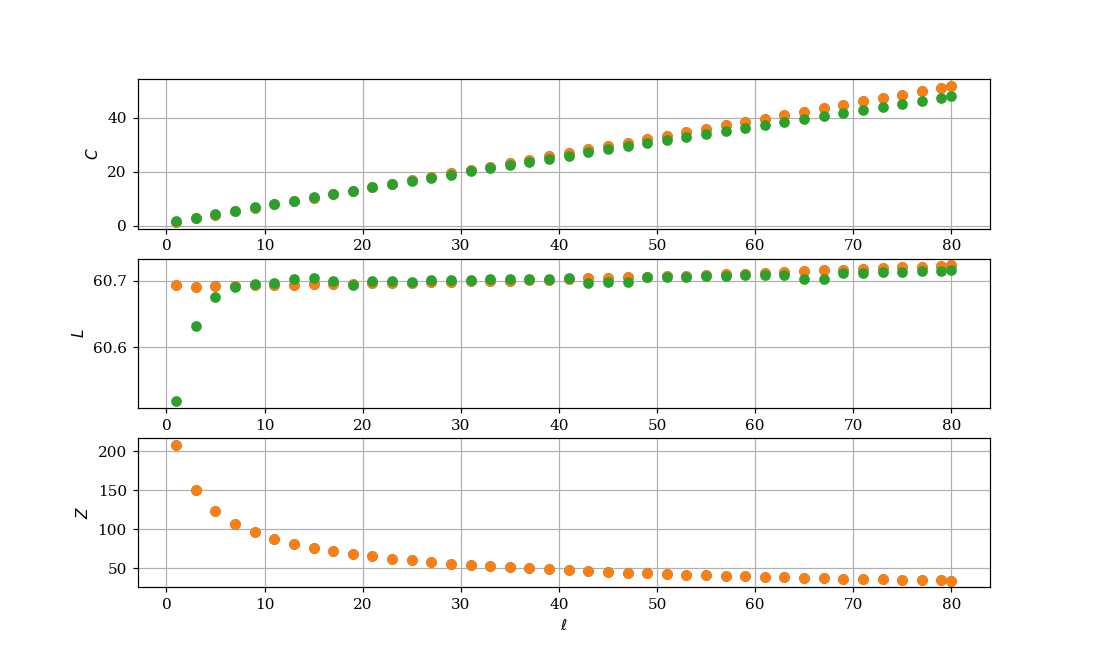

Text(0.5, 0, '$\\ell$')

In [7]:
Z0val  = lambda L, C : np.sqrt(L/C)

fig, ax = plt.subplots(3,1)

ax[0].plot(l,C0/1e-15,    marker='o', ls='none')
ax[0].plot(l,CfitC/1e-15, marker='o', ls='none')
ax[0].plot(l,LfitC/1e-15, marker='o', ls='none')

ax[0].set_ylabel('$C$')

ax[1].plot(l,L0/1e-12,    marker='o', ls='none')
ax[1].plot(l,LfitL/1e-12, marker='o', ls='none')
ax[1].plot(l,CfitL/1e-12, marker='o', ls='none')
ax[1].set_ylabel('$L$')

ax[2].plot(l, Z0val(L0, C0), marker='o', ls='none')
ax[2].plot(l, Z0val(L0, CfitC), marker='o', ls='none')

#ax[2].plot(l, Z0val(L0,    CfitC), marker='o', ls='none')
#ax[2].plot(l, Z0val(LfitL, CfitC), marker='o', ls='none')
#ax[2].plot(l, Z0val(CfitL, CfitC), marker='o', ls='none')
#ax[2].plot(l, Z0val(CfitL, LfitC), marker='o', ls='none')

ax[2].set_ylabel('$Z$')

ax[2].set_xlabel('$\ell$')



#ax[1].plot(l,LfitL/1e-12, marker='o', ls='none')
#ax[1].plot(l,CfitL/1e-12, marker='o', ls='none')
